In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe as pip

In [6]:
from IPython import display

In [7]:
sim_p=pip.Pipe_Flow()
sim_p_Obst=pip.Pipe_Flow_Obstacles()

In [11]:
%%prun
sim_p_Obst.run(100)

IndexError: tuple index out of range

When running this on my computer I get that the time it takes for it to run over 100 times is 38.549 seconds, which compared to other stuff is quite a significant slowdown

Now I will try modify the boundary conditions and create a new sub-class to incorporate the periodic boundary condition in Python directly

<matplotlib.colorbar.Colorbar instance at 0x10babd368>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


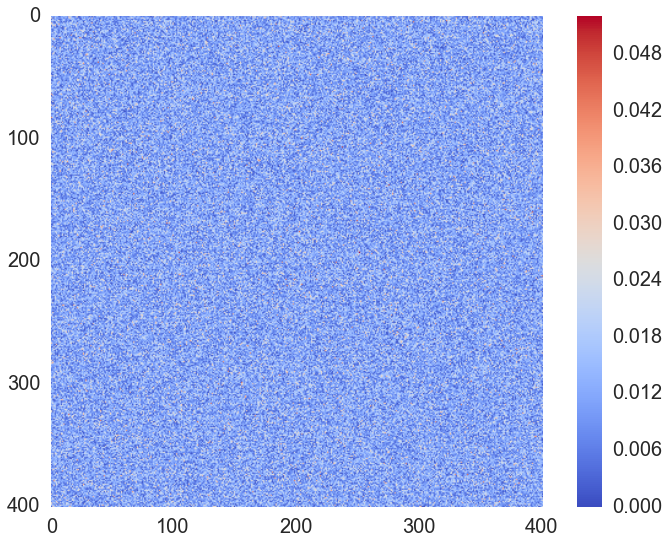

In [8]:
mag_cl = np.sqrt(sim_p.u**2 + sim_p.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

In [9]:
#### Input to the simulation in SI. ######
diameter = 2. # meters
length = 4. # meters

deltaP = -.1

dr = 0.005
dt = dr**2

viscosity = 10.**-6. # More viscous = easier to simulate!

##### Derived parameters ######
print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

nx = lx + 1
ny = ly + 1

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

obstacle_size=.25 # meters

Desired viscosity: 1e-06

###### Simulation Parameters #########

ly 400
lx 800
omega: 0.500003


In [10]:
sim = pip.Pipe_Flow_Obstacle(deltaP = deltaP)

AttributeError: 'module' object has no attribute 'Pipe_Flow_Obstacle'

In [49]:
sim.run(100)

<matplotlib.colorbar.Colorbar instance at 0x10f7df5a8>

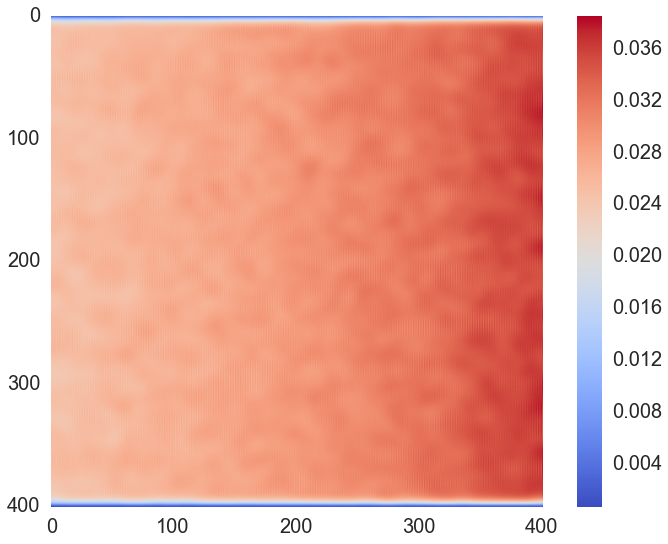

In [50]:
mag_cl = np.sqrt(sim.u**2 + sim.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

Testing new boundary conditions from here on out and see if that works. This calls the new class that aleternates the boundary conditions...

<matplotlib.colorbar.Colorbar instance at 0x114be40e0>

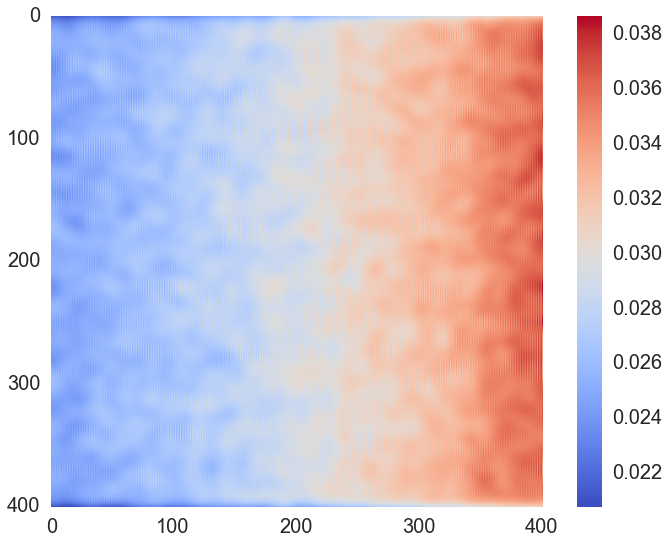

In [40]:
sim_NewBC = pip.Pipe_Flow_PeriodicBC(deltaP = deltaP)
sim_NewBC.run(100)
mag_cl = np.sqrt(sim_NewBC.u**2 + sim_NewBC.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

Now going to try to impose the velocity boundary condition on python before moving it all to cython, there are some edge effects around the corners. Need to pay attention to that.

<matplotlib.colorbar.Colorbar instance at 0x10ca8bf80>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


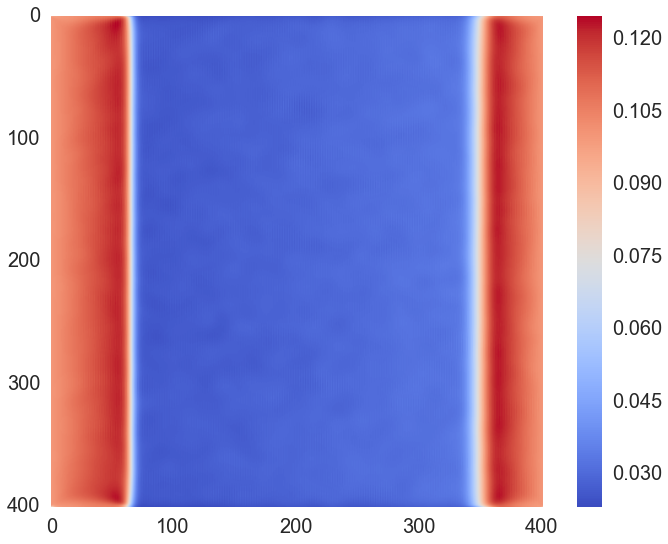

In [11]:
sim_NewBC_Inlet = pip.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(100)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

In [12]:

sim_NewBC_Inlet = pip.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(1000)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

KeyboardInterrupt: 

<matplotlib.colorbar.Colorbar instance at 0x10b0f2200>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


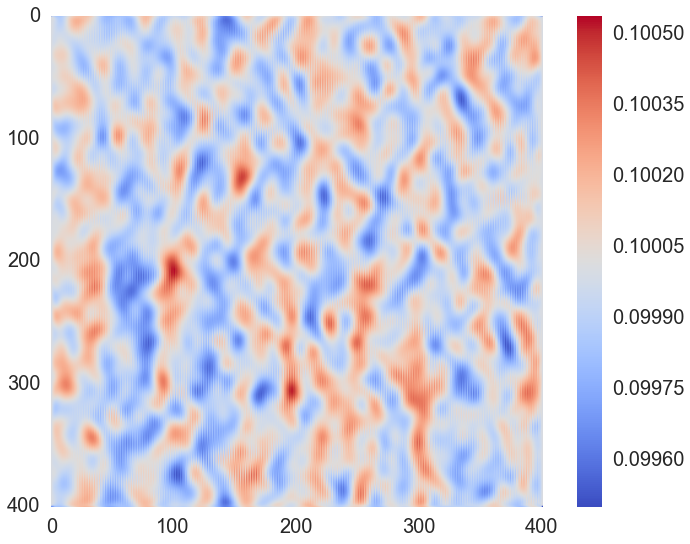

In [10]:
sim_NewBC_Inlet = pip.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(100)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x116b78518>

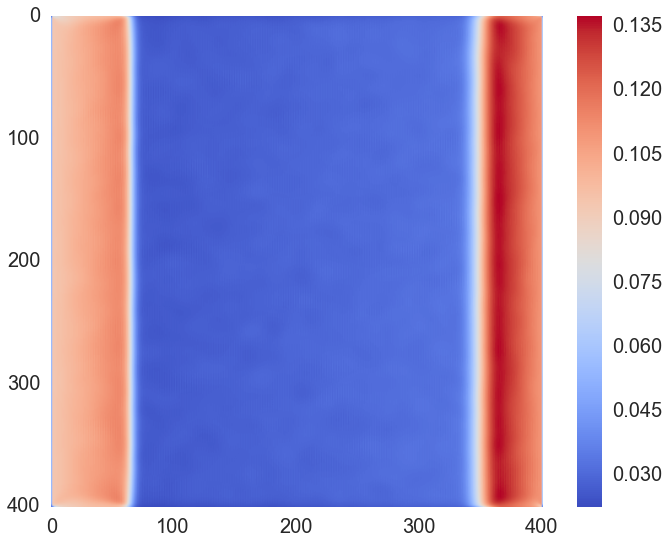

In [42]:
sim_NewBC_Inlet = pip.Pipe_Flow_PeriodicBC_VelocityInlet(u_w=0.1)
sim_NewBC_Inlet.run(100)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1190df5a8>

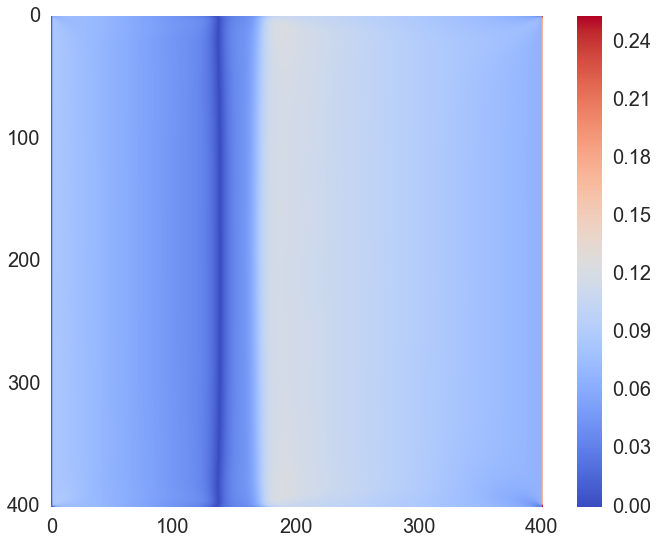

In [45]:
sim_NewBC_Inlet = pip.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(1000)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

## Playing with cython now


In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from LB_D2Q9 import pipe_cython as lb

In [4]:
%%prun
sim_NewBC_Inlet.run(100)

         2903 function calls in 3.505 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    1.609    0.016    1.609    0.016 pipe_cython.pyx:98(update_feq)
      100    0.981    0.010    0.981    0.010 pipe_cython.pyx:252(collide_particles)
      100    0.604    0.006    0.605    0.006 pipe_cython.pyx:215(move)
      100    0.198    0.002    0.296    0.003 pipe_cython.pyx:335(update_hydro)
      100    0.096    0.001    0.096    0.001 {method 'reduce' of 'numpy.ufunc' objects}
      100    0.009    0.000    0.011    0.000 pipe_cython.pyx:277(move_bcs)
        1    0.003    0.003    3.505    3.505 pipe_cython.pyx:259(run)
      500    0.002    0.000    0.002    0.000 stringsource:319(__cinit__)
      100    0.001    0.000    0.098    0.001 fromnumeric.py:1733(sum)
      500    0.001    0.000    0.002    0.000 stringsource:615(memoryview_cwrapper)
      100    0.001    0.000    0.001    0.000 {isinstance}
      500    0.001    0.000    0.001    0.000 stringsource:341(__dealloc__)
      100    0.000    0.000    0.096    0.001 _methods.py:31(_sum)
      500    0.000    0.000    0.000    0.000 stringsource:621(memoryview_check)
        1    0.000    0.000    3.505    3.505 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

<matplotlib.colorbar.Colorbar instance at 0x10b8ba488>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


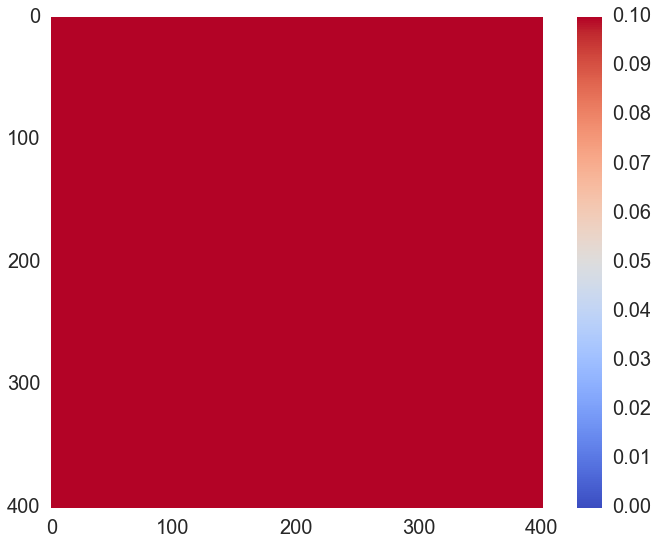

In [3]:
sim_NewBC_Inlet = lb.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(100)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
plt.clim(0, 0.1)
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x10b7a9290>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


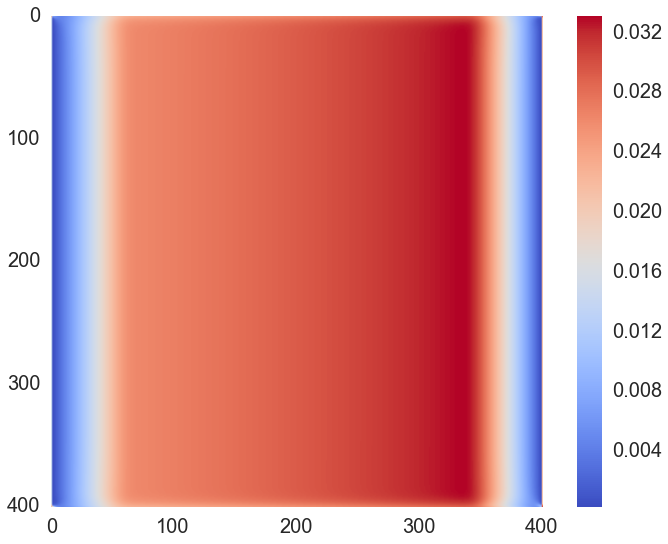

In [3]:
sim_NewBC_Inlet = lb.Pipe_Flow_PeriodicBC_VelocityInlet()
sim_NewBC_Inlet.run(100)
mag_cl = np.sqrt(sim_NewBC_Inlet.u**2 + sim_NewBC_Inlet.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

# Playing with openCL from here on out